In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('./titanic.csv')
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Age.isna().sum()

177

In [4]:
from sklearn.impute import SimpleImputer

In [6]:
si = SimpleImputer (strategy = 'median')

In [7]:
imputed_age = si.fit_transform (df[['Age']])

In [8]:
df['imputed_age'] = imputed_age

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
imputed_age      0
dtype: int64

In [10]:
df[['female', 'male']] = pd.get_dummies (df.Sex)

In [11]:
df.loc[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,imputed_age,female,male
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,True,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,True,False


In [12]:
df.dropna(subset = ['Embarked'], inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label = LabelEncoder ()
embarked_encoded = label.fit_transform (df[['Embarked']])

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
df['embarked_encoded'] = embarked_encoded

In [16]:
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,imputed_age,female,male,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,False,True,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,True,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,True,False,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,True,False,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,False,True,2


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'imputed_age', 'female',
       'male', 'embarked_encoded'],
      dtype='object')

In [24]:
X = df[['Pclass', 'imputed_age', 'female', 'male', 'embarked_encoded']]
y = df.Survived

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1)

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression ()
log_reg_model.fit (X_train, y_train)

LogisticRegression()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier (n_neighbors = 7)
knn_model.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
lr_y_pred = log_reg_model.predict (X_test)

In [30]:
lr_prob_y_pred = log_reg_model.predict_proba (X_test)

In [31]:
lr_prob_y_pred[1:3]

array([[0.14544436, 0.85455564],
       [0.94559081, 0.05440919]])

In [32]:
knn_prob_y_pred = knn_model.predict_proba (X_test)

In [33]:
from sklearn.metrics import roc_curve, auc

In [35]:
lr_fpr, lr_tpr, lr_threshold = roc_curve (y_test, lr_prob_y_pred[:,1])

In [36]:
lr_auc = auc (lr_fpr, lr_tpr)

In [37]:
knn_fpr, knn_tpr, knn_threshold = roc_curve (y_test, knn_prob_y_pred[:,1])

In [38]:
knn_auc = auc (knn_fpr, knn_tpr)

In [39]:
import matplotlib.pyplot as plt

[]

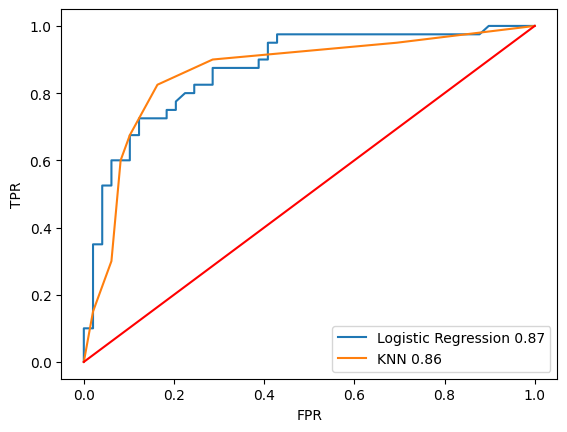

In [40]:
plt.figure ()
plt.plot (lr_fpr, lr_tpr, label = 'Logistic Regression %0.2f'%lr_auc)
plt.plot (knn_fpr, knn_tpr, label = 'KNN %0.2f'%knn_auc)
plt.plot ([0,1], [0,1], 'r-')
plt.legend ()
plt.xlabel ('FPR')
plt.ylabel ('TPR')
plt.plot ()